In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('heart.csv') 


X =df.drop('cp' , axis=1)
y = df['cp'] 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled , y_train)

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test , y_pred)

print("Confusion matrix : " , cm)
print("Classification report :" , classification_report(y_test , y_pred))

Confusion matrix :  [[79  3 17  0]
 [14 10 15  0]
 [13  3 38  1]
 [ 7  0  3  2]]
Classification report :               precision    recall  f1-score   support

           0       0.70      0.80      0.75        99
           1       0.62      0.26      0.36        39
           2       0.52      0.69      0.59        55
           3       0.67      0.17      0.27        12

    accuracy                           0.63       205
   macro avg       0.63      0.48      0.49       205
weighted avg       0.64      0.63      0.60       205



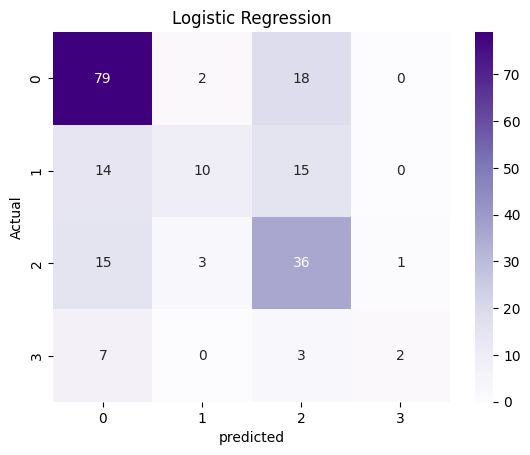

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot(y_test , y_pred , title):
    cm = confusion_matrix(y_test , y_pred)
    sns.heatmap(cm ,fmt='d' , annot=True , cmap='Purples')
    plt.xlabel("predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
plot(y_test , y_pred , "Logistic Regression")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import(confusion_matrix , f1_score, recall_score , precision_score , roc_auc_score , accuracy_score, roc_curve)
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart.csv')

X = df.drop('target' , axis=1)
y = df['target']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train= scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

model =LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[: , 1]


In [3]:
#print("F1 score : " , f1_score(y_test , y_pred))
#print("accuracy score : " , accuracy_score(y_test , y_pred))
#print("recall score : " ,recall_score(y_test , y_pred))
#print("precision score : " , precision_score(y_test , y_pred))
#print("probability : " ,roc_auc_score(y_test , y_prob))

print("Confusion matrix:" , confusion_matrix(y_test , y_pred))
print("Accuracy score :" , accuracy_score(y_test , y_pred))
print("Precision :" , precision_score(y_test , y_pred))
print("Recall :" , recall_score(y_test , y_pred))
print("F1 score :" , f1_score(y_test , y_pred))
print("ROC AUC :" , roc_auc_score(y_test , y_prob))

Confusion matrix: [[73 29]
 [13 90]]
Accuracy score : 0.7951219512195122
Precision : 0.7563025210084033
Recall : 0.8737864077669902
F1 score : 0.8108108108108107
ROC AUC : 0.8787359604035789


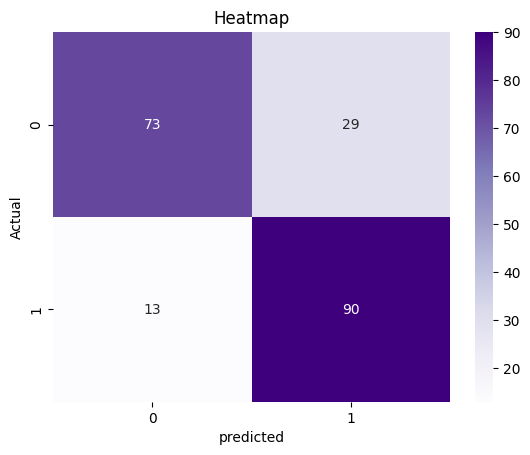

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , fmt='d' , annot=True , cmap='Purples')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Heatmap')
plt.show()

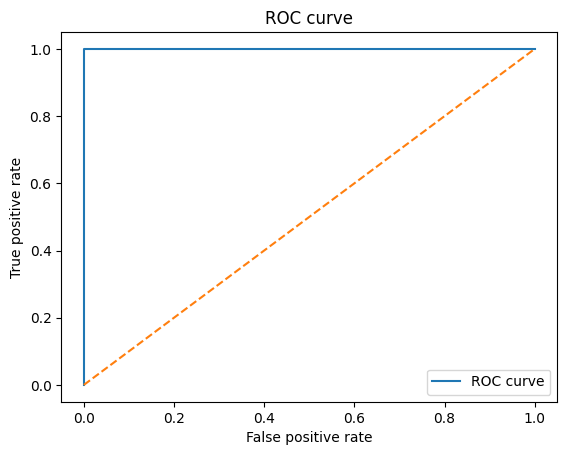

In [6]:
fpr , tpr , thresholds = roc_curve(y_pred , y_prob)
plt.plot(fpr , tpr , label="ROC curve")
plt.plot([0,1],[0,1] , linestyle = '--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC curve')
plt.legend()
plt.show()